In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans


In [82]:
df = pd.read_csv("../Data/BankChurners_original.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [83]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [84]:
# Drop the last two columns
df= df.drop( columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'] )

In [85]:
print(df.dtypes)

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object


In [86]:
# Handling Missing Values
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [87]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


d:\customer_churn_analysis\my_environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\customer_churn_analysis\my_environment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


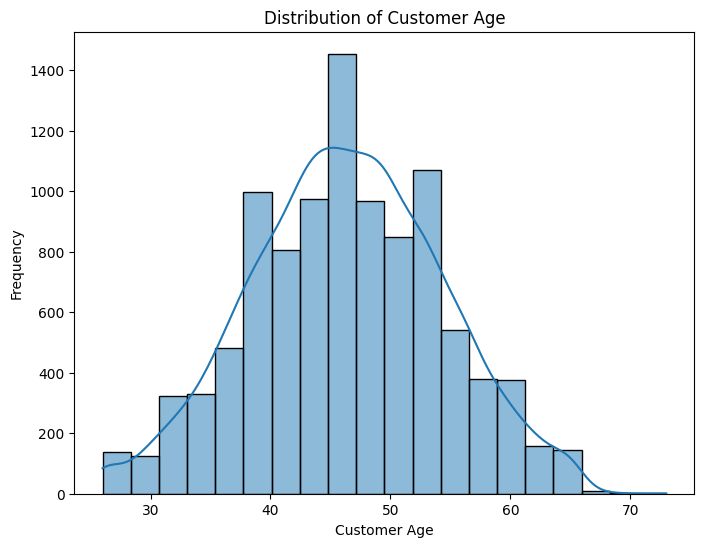

In [88]:
# Visualize the distribution of 'Customer_Age'
plt.figure(figsize=(8, 6))
sns.histplot(df['Customer_Age'], bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

d:\customer_churn_analysis\my_environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\customer_churn_analysis\my_environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\customer_churn_analysis\my_environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\customer_churn_analysis\my_environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

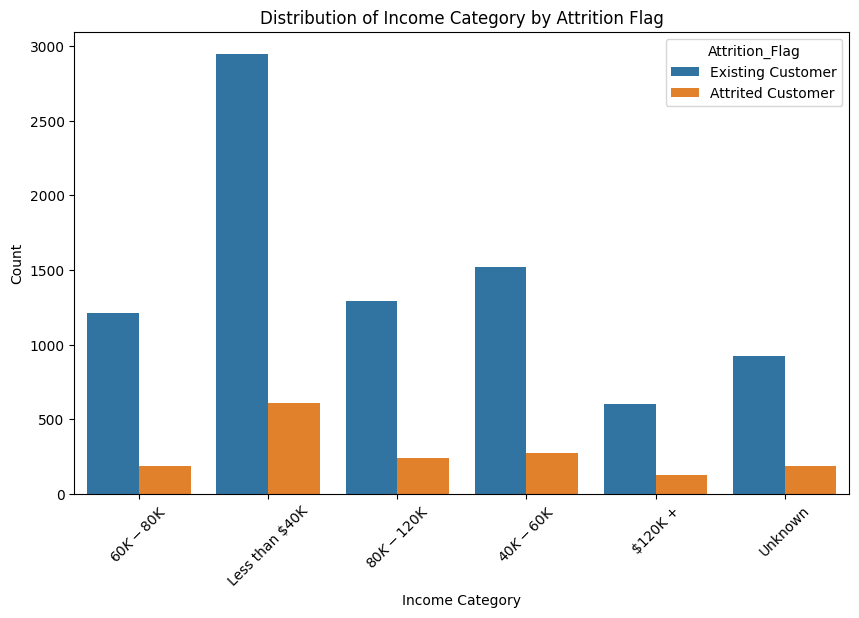

In [89]:
# Visualize the distribution of 'Income_Category'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Income_Category', hue='Attrition_Flag')
plt.title('Distribution of Income Category by Attrition Flag')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [90]:
# Label Encoding for a categorical column (Gender) M=1, F=0
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [91]:
# Label Encoding for a categorical column (Attrition_Flag) Existing Customer=1, Attrited Customer=0
label_encoder = LabelEncoder()
df["Attrition_Flag"] = label_encoder.fit_transform(df["Attrition_Flag"])

In [92]:
unique_education_levels = df['Education_Level'].unique()
print(unique_education_levels)


['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']


In [93]:
# Create a custom mapping dictionary
education_level_mapping = {
    'Unknown': 0,
    'Uneducated': 1,
    'High School': 2,
    'College': 3,
    'Graduate': 4,
    'Post-Graduate': 5,
    'Doctorate': 6
}

# Replace values in the 'Education_Level' column using the custom mapping
df['Education_Level'] = df['Education_Level'].map(education_level_mapping)
df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,2,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,4,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,4,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,2,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,1,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [94]:
unique_Marital_Status = df['Marital_Status'].unique()
print(unique_Marital_Status)

['Married' 'Single' 'Unknown' 'Divorced']


In [95]:
# Perform one-hot encoding on the 'Marital_Status' column
df = pd.get_dummies(df, columns=['Marital_Status'], drop_first=True, dtype=int)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,768805383,1,45,1,3,2,$60K - $80K,Blue,39,5,...,777,11914.0,1.335,1144,42,1.625,0.061,1,0,0
1,818770008,1,49,0,5,4,Less than $40K,Blue,44,6,...,864,7392.0,1.541,1291,33,3.714,0.105,0,1,0
2,713982108,1,51,1,3,4,$80K - $120K,Blue,36,4,...,0,3418.0,2.594,1887,20,2.333,0.000,1,0,0
3,769911858,1,40,0,4,2,Less than $40K,Blue,34,3,...,2517,796.0,1.405,1171,20,2.333,0.760,0,0,1
4,709106358,1,40,1,3,1,$60K - $80K,Blue,21,5,...,0,4716.0,2.175,816,28,2.500,0.000,1,0,0


In [96]:
# Marital_Status_mapping = {
#     'Unknown' : 0,
#     'Single' : 1,
#     'Married' : 2,
#     'Divorced': 3
# }
# df['Marital_Status'] = df['Marital_Status'].map(Marital_Status_mapping)
# df.head()

In [97]:
unique_Card_Category = df['Card_Category'].unique()
print(unique_Card_Category)

['Blue' 'Gold' 'Silver' 'Platinum']


In [98]:
# Define the custom mapping dictionary based on hierarchy
Card_Category_mapping = {
    'Blue' : 0,
    'Silver' : 1,
    'Gold' : 2,
    'Platinum' : 3
}

df['Card_Category'] = df['Card_Category'].map(Card_Category_mapping)
df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,768805383,1,45,1,3,2,$60K - $80K,0,39,5,...,777,11914.0,1.335,1144,42,1.625,0.061,1,0,0
1,818770008,1,49,0,5,4,Less than $40K,0,44,6,...,864,7392.0,1.541,1291,33,3.714,0.105,0,1,0
2,713982108,1,51,1,3,4,$80K - $120K,0,36,4,...,0,3418.0,2.594,1887,20,2.333,0.000,1,0,0
3,769911858,1,40,0,4,2,Less than $40K,0,34,3,...,2517,796.0,1.405,1171,20,2.333,0.760,0,0,1
4,709106358,1,40,1,3,1,$60K - $80K,0,21,5,...,0,4716.0,2.175,816,28,2.500,0.000,1,0,0


In [99]:
unique_Income_Category = df['Income_Category'].unique()
print(unique_Income_Category)

['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']


In [100]:
# Define the custom mapping dictionary based on hierarchy
Income_Category_mapping = {
    'Unknown' : 0,
    'Less than $40K' : 1,
    '$40K - $60K' : 2,
    '$60K - $80K' : 3,
    '$80K - $120K' : 4,
    '$120K +' : 5,
}

df['Income_Category'] = df['Income_Category'].map(Income_Category_mapping)
df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,768805383,1,45,1,3,2,3,0,39,5,...,777,11914.0,1.335,1144,42,1.625,0.061,1,0,0
1,818770008,1,49,0,5,4,1,0,44,6,...,864,7392.0,1.541,1291,33,3.714,0.105,0,1,0
2,713982108,1,51,1,3,4,4,0,36,4,...,0,3418.0,2.594,1887,20,2.333,0.000,1,0,0
3,769911858,1,40,0,4,2,1,0,34,3,...,2517,796.0,1.405,1171,20,2.333,0.760,0,0,1
4,709106358,1,40,1,3,1,3,0,21,5,...,0,4716.0,2.175,816,28,2.500,0.000,1,0,0


In [101]:
print(df.dtypes)

CLIENTNUM                     int64
Attrition_Flag                int32
Customer_Age                  int64
Gender                        int32
Dependent_count               int64
Education_Level               int64
Income_Category               int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Marital_Status_Married        int32
Marital_Status_Single         int32
Marital_Status_Unknown        int32
dtype: object


In [102]:
# save a new csv file that we want to work on it 
df.to_csv("../Data/BankChurners.csv", index=False)


In [103]:
# Define the features (X) and the target (y)
X = df[['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
        'Marital_Status_Unknown',"Marital_Status_Single","Marital_Status_Married", 'Income_Category', 'Card_Category', 'Months_on_book',
        'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
        'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
        'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
y = df['Attrition_Flag']

# Split the data into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status_Unknown,Marital_Status_Single,Marital_Status_Married,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,1,3,2,0,0,1,3,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,0,5,4,0,1,0,1,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,1,3,4,0,0,1,4,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,0,4,2,1,0,0,1,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,1,3,1,0,0,1,3,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## LogisticRegression Model

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)

# Fit the model on the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("")
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)



Accuracy: 0.859822309970385

Confusion Matrix:
 [[ 118  209]
 [  75 1624]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.36      0.45       327
           1       0.89      0.96      0.92      1699

    accuracy                           0.86      2026
   macro avg       0.75      0.66      0.69      2026
weighted avg       0.84      0.86      0.84      2026



d:\customer_churn_analysis\my_environment\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## DecisionTree Model

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [106]:
# Make predictions on the test data
y_pred = decision_tree.predict(X_test)

In [107]:
# Evaluate the model's performance

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Confusion Matrix:
 [[ 250   77]
 [  73 1626]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77       327
           1       0.95      0.96      0.96      1699

    accuracy                           0.93      2026
   macro avg       0.86      0.86      0.86      2026
weighted avg       0.93      0.93      0.93      2026



Predicted,0,1,All
Actual,,,
0,250,77,327
1,73,1626,1699
All,323,1703,2026


Accuracy: Measures the overall correctness of predictions.

Precision: Measures the accuracy of positive predictions.

Recall: Measures the proportion of actual positives that were correctly predicted.

F1-score: Combines precision and recall into a single metric, providing a balance between the two.

## Randomforest Model

In [108]:
# Model Building
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)


In [109]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nClassification Report:\n", class_report)
print("\nConfusion Matrix:\n", conf_matrix)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)


Accuracy: 0.9570582428430404

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86       327
           1       0.96      0.99      0.97      1699

    accuracy                           0.96      2026
   macro avg       0.94      0.89      0.92      2026
weighted avg       0.96      0.96      0.96      2026


Confusion Matrix:
 [[ 261   66]
 [  21 1678]]


Predicted,0,1,All
Actual,,,
0,261,66,327
1,21,1678,1699
All,282,1744,2026


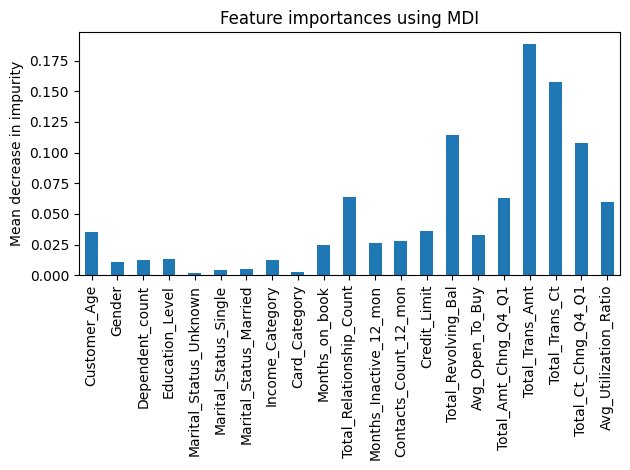

In [110]:
import pandas as pd
importances = rf_classifier.feature_importances_
forest_importances = pd.Series(importances, index = X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## K-Nearest Neighbors (KNN) Model

In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)  
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [113]:
# Convert X_test to a NumPy array
X_test_np = X_test.to_numpy()
y_pred = knn_classifier.predict(X_test_np)


d:\customer_churn_analysis\my_environment\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [114]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", report)


Accuracy: 0.8899308983218164

Confusion Matrix:
 [[ 178  149]
 [  74 1625]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.54      0.61       327
           1       0.92      0.96      0.94      1699

    accuracy                           0.89      2026
   macro avg       0.81      0.75      0.78      2026
weighted avg       0.88      0.89      0.88      2026



In [115]:
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,178,149,327
1,74,1625,1699
All,252,1774,2026


## Clustering

In [116]:
from sklearn.cluster import KMeans

df = pd.read_csv("../Data/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,768805383,1,45,1,3,2,3,0,39,5,...,777,11914.0,1.335,1144,42,1.625,0.061,1,0,0
1,818770008,1,49,0,5,4,1,0,44,6,...,864,7392.0,1.541,1291,33,3.714,0.105,0,1,0
2,713982108,1,51,1,3,4,4,0,36,4,...,0,3418.0,2.594,1887,20,2.333,0.000,1,0,0
3,769911858,1,40,0,4,2,1,0,34,3,...,2517,796.0,1.405,1171,20,2.333,0.760,0,0,1
4,709106358,1,40,1,3,1,3,0,21,5,...,0,4716.0,2.175,816,28,2.500,0.000,1,0,0


In [117]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Income_Category',
       'Card_Category', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown'],
      dtype='object')

In [118]:
from sklearn.cluster import KMeans

df = pd.read_csv("../Data/BankChurners.csv")

# Define the features (X) and the target (y)
X = df[['Attrition_Flag','Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
        'Marital_Status_Unknown',"Marital_Status_Single","Marital_Status_Married", 'Income_Category', 'Card_Category', 'Months_on_book',
        'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
        'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
        'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]


#### Elbow Method:

Fit K-Means clustering for a range of values of k (e.g., from 1 to 10).

Calculate the sum of squared distances (inertia) from each point to its assigned cluster center for each k.
Plot the inertia values for different values of k.

Look for the "elbow point" in the plot, where the rate of decrease in inertia starts to slow down. This point is often a good estimate of the optimal k.

d:\customer_churn_analysis\my_environment\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\customer_churn_analysis\my_environment\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\customer_churn_analysis\my_environment\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\customer_churn_analysis\my_environment\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default valu

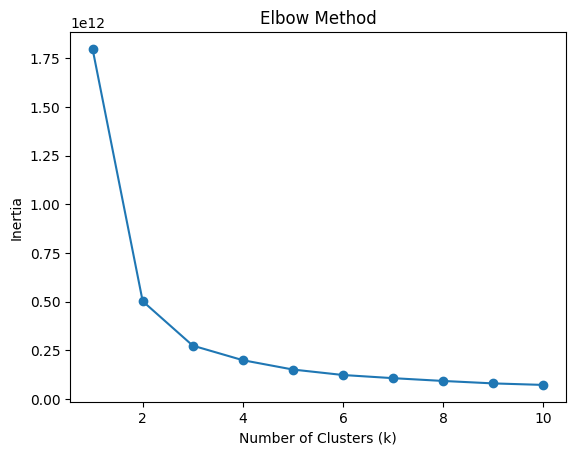

In [119]:


inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [120]:
# Initialize the K-Means model with k=5
kmeans = KMeans(n_clusters=2, random_state=0)
# Fit the K-Means model to your data
kmeans.fit(X)
# Get cluster assignments for each data point
cluster_assignments = kmeans.labels_



d:\customer_churn_analysis\my_environment\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [121]:
# Add the cluster assignments to your DataFrame
df['Cluster'] = cluster_assignments
df.shape

(10127, 24)

In [122]:
# Access cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[8.35645933e-01, 4.63282297e+01, 3.90789474e-01, 2.31016746e+00,
        2.60490431e+00, 7.08133971e-02, 3.83014354e-01, 4.75358852e-01,
        1.80789474e+00, 1.94976077e-02, 3.59227273e+01, 3.85227273e+00,
        2.34844498e+00, 2.44688995e+00, 4.95967441e+03, 1.16170993e+03,
        3.79796449e+03, 7.58943900e-01, 4.18681328e+03, 6.41008373e+01,
        7.12351675e-01, 3.22928708e-01],
       [8.56819468e-01, 4.63152235e+01, 8.50028297e-01, 2.51669496e+00,
        2.58800226e+00, 8.88511602e-02, 4.19354839e-01, 4.03508772e-01,
        3.40011319e+00, 3.87096774e-01, 3.59552915e+01, 3.62478778e+00,
        2.30673458e+00, 2.49518959e+00, 2.60061783e+04, 1.16803792e+03,
        2.48381404e+04, 7.64656480e-01, 5.43204471e+03, 6.84442558e+01,
        7.11610640e-01, 4.76304471e-02]])

In [123]:
# Calculate the percentage of "Existing Customer" in each cluster
cluster_Existing_percentage = (df.groupby('Cluster')['Attrition_Flag'].mean() * 100).sort_values()

# Display the cluster percentages
print(cluster_Existing_percentage)


Cluster
0    83.564593
1    85.681947
Name: Attrition_Flag, dtype: float64


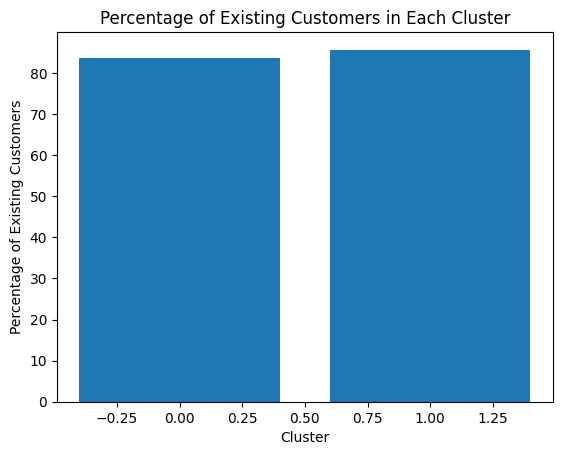

In [124]:
# Plot the percentage of existing customers in each cluster
plt.bar(cluster_Existing_percentage.index, cluster_Existing_percentage.values)
plt.title('Percentage of Existing Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage of Existing Customers')
plt.show()

d:\customer_churn_analysis\my_environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\customer_churn_analysis\my_environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\customer_churn_analysis\my_environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\customer_churn_analysis\my_environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

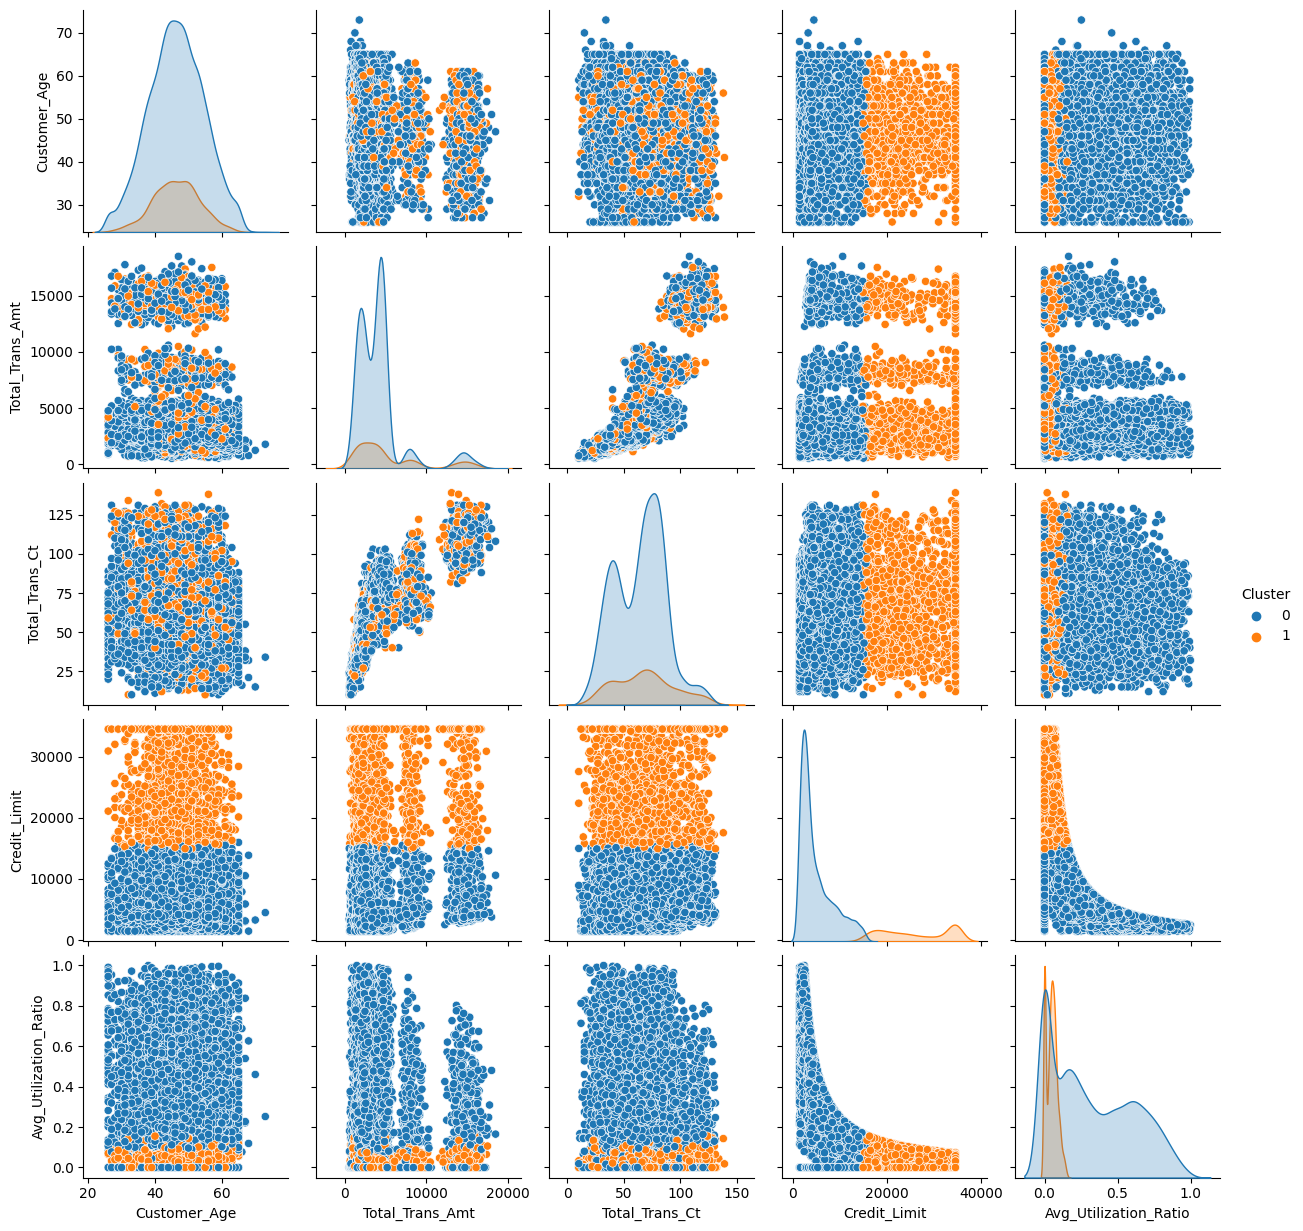

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features for pair plots
selected_features = ['Customer_Age', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Credit_Limit', 'Avg_Utilization_Ratio']

# Create a pair plot for selected features
sns.pairplot(df, vars=selected_features, hue='Cluster')
plt.show()
